In [1]:
print("hello world")

hello world


In [6]:
import numpy as np

In [16]:
import matplotlib as mpl

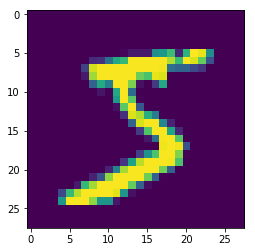

In [17]:
import matplotlib.pyplot as plt
img = plt.imread("./../images/mnist/train_0.bmp")
plt.imshow(img)

In [1]:
from pynq import Overlay
import pynq.lib.dma
from pynq import allocate
import time

In [2]:
overlay = Overlay("./../bitstreams/dma_tutorial.bit")

In [3]:
overlay.ip_dict

{'axi_dma_from_pl_to_ps': {'addr_range': 65536,
  'device': <pynq.pl_server.device.XlnkDevice at 0xb02c7430>,
  'driver': pynq.lib.dma.DMA,
  'fullpath': 'axi_dma_from_pl_to_ps',
  'gpio': {},
  'interrupts': {},
  'mem_id': 'S_AXI_LITE',
  'parameters': {'C_BASEADDR': '0x40400000',
   'C_DLYTMR_RESOLUTION': '125',
   'C_ENABLE_MULTI_CHANNEL': '0',
   'C_FAMILY': 'zynq',
   'C_HIGHADDR': '0x4040FFFF',
   'C_INCLUDE_MM2S': '0',
   'C_INCLUDE_MM2S_DRE': '0',
   'C_INCLUDE_MM2S_SF': '1',
   'C_INCLUDE_S2MM': '1',
   'C_INCLUDE_S2MM_DRE': '0',
   'C_INCLUDE_S2MM_SF': '1',
   'C_INCLUDE_SG': '0',
   'C_INCREASE_THROUGHPUT': '0',
   'C_MICRO_DMA': '0',
   'C_MM2S_BURST_SIZE': '16',
   'C_M_AXIS_MM2S_CNTRL_TDATA_WIDTH': '32',
   'C_M_AXIS_MM2S_TDATA_WIDTH': '32',
   'C_M_AXI_MM2S_ADDR_WIDTH': '32',
   'C_M_AXI_MM2S_DATA_WIDTH': '32',
   'C_M_AXI_S2MM_ADDR_WIDTH': '32',
   'C_M_AXI_S2MM_DATA_WIDTH': '32',
   'C_M_AXI_SG_ADDR_WIDTH': '32',
   'C_M_AXI_SG_DATA_WIDTH': '32',
   'C_NUM_MM2S_CHANNE

In [4]:
dma_send = overlay.axi_dma_from_ps_to_pl
dma_recv = overlay.axi_dma_from_pl_to_ps

In [11]:
buf_size = 2621440 #1024*1024/4
input_buf = allocate(shape=(buf_size,), dtype=np.uint32)
output_buf = allocate(shape=(buf_size,), dtype=np.uint32)
for i in range(buf_size):
    input_buf[i] = i

In [12]:
start = time.time()
dma_send.sendchannel.transfer(input_buf)
dma_recv.recvchannel.transfer(output_buf)
dma_send.sendchannel.wait()
dma_recv.recvchannel.wait()
end = time.time()
print('time cost: ' + str(round(end-start,5)) + ' s')

time cost: 0.08592 s


In [13]:
len = buf_size*4
cost = round(end-start,5)
speed = round(len/(cost*len),5)
print('transfer speed: ' + str(speed) + ' MB/s')

transfer speed: 11.63873 MB/s


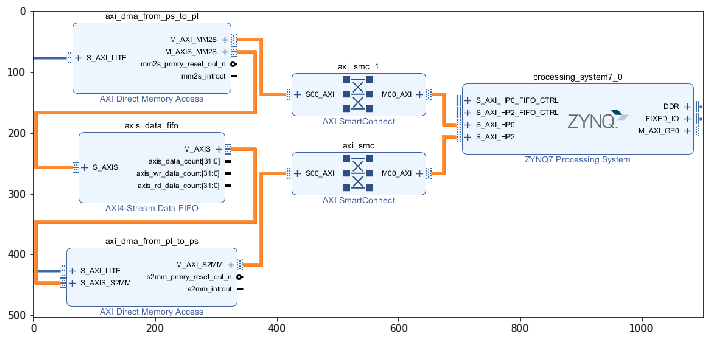

In [28]:
imgdma = plt.imread("./../images/dma/dma_stream_example.png")
plt.figure(figsize=(12, 10))
plt.imshow(imgdma)